In [1]:
import os 
import pandas as pd
from pgmpy.readwrite import NETReader

print(os.getcwd())

from experiments_spring.train_single import *
from experiment2_spring_helpers import *
from experiments_spring.create_config import create

/home/ignacy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/ignacy/cmu/bnc-formal-verification/src


In [2]:
MODEL_ID = 8765
EXP_DIR = f"experiments_spring"
DATA_FOLDER = f"data"
MODELS_FOLDER = f"models"
DATASET = "credit10k"
ARTIFACTS_PATH = os.path.join(EXP_DIR, 'artifacts', f'{DATASET}_{MODEL_ID}_artifacts')
RULES_FILEPATH = os.path.join(EXP_DIR, f'rules_{DATASET}.json')
ODD_FILEPATH = os.path.join('odd_models', f'{DATASET}_{MODEL_ID}.odd')

In [3]:
assert os.getcwd().split('/')[-1] == 'src', 'Please run this script from the src directory'

Train shape: (7000, 12), Test shape: (3000, 12)


Building tree:   0%|          | 0/66.0 [00:00<?, ?it/s]

Building tree: 100%|██████████| 66/66.0 [00:01<00:00, 41.62it/s]


Parents of CreditWorthiness: []


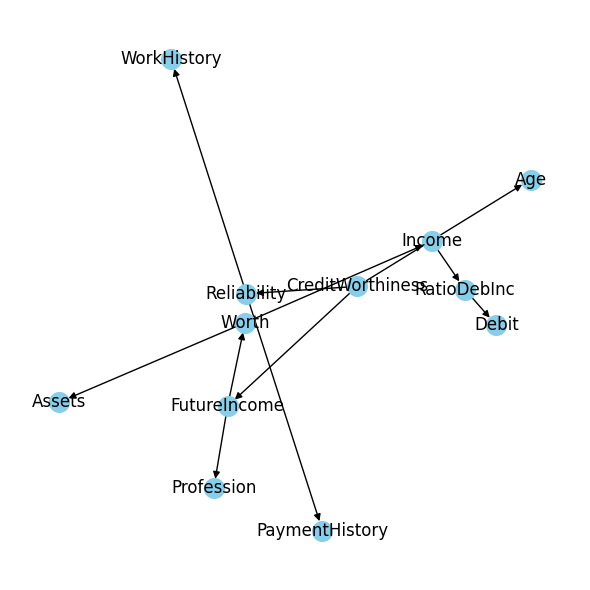

100%|██████████| 2736/2736 [00:06<00:00, 410.42it/s] 


Accuracy on test data: 0.7003333333333334 for model
Test accuracy: 0.7003333333333334


In [4]:
train_df, test_df, target_col = prep_data(f'{EXP_DIR}/{DATA_FOLDER}/{DATASET}.csv')

model = train_model_structure(train_df, target_col)

plot_model(model)

trained_model, test_accuracy = estimate_model(model, train_df, test_df, target_col)
print(f'Test accuracy: {test_accuracy}')

In [5]:
path = os.path.join(os.getcwd(), f'{EXP_DIR}')
config_paths = save_model(path, trained_model, MODEL_ID, target_col, train_df.shape[1])
print(f'Configs saved to {config_paths}')

/home/ignacy/cmu/bnc-formal-verification/src
Configs saved to ['/home/ignacy/cmu/bnc-formal-verification/src/bnc_configs/credit10k_8765.json']


javac -d exe -sourcepath src -cp samiam:samiam/inflib.jar:include/* -Xlint:unchecked  src/RunCompiler.java src/TestOdd.java src/bnccompiler/core/OrderHeuristic.java src/bnccompiler/core/BayesianNetworkClassifier.java src/bnccompiler/core/BayesianNetworkClassifierToOdd.java src/bnccompiler/core/BayesianNetworkClassifierCompilationOrder.java src/bnccompiler/core/DecisionKey.java src/bnccompiler/core/OddNode.java src/bnccompiler/CompileClassifierConfig.java src/bnccompiler/CompileClassifier.java
g++ -std=c++0x -Wno-sign-compare -O2 -Wall -I./include   -c -o src/oddtosdd.o src/oddtosdd.cpp
g++ -std=c++0x -Wno-sign-compare -O2 -Wall -I./include src/oddtosdd.o -L./lib -lsdd -lm -o exe/oddtosdd


/usr/bin/ld: ./lib/libsdd.a(manager.o): relocation R_X86_64_32 against `.rodata' can not be used when making a PIE object; recompile with -fPIE
/usr/bin/ld: failed to set dynamic section sizes: bad value
collect2: error: ld returned 1 exit status
make: *** [Makefile:13: all] Error 1


-----Print Compilation Order-----
h_order:
{"CreditWorthiness"}
{"CreditWorthiness"}
{"CreditWorthiness"}
{"FutureIncome"}
{"FutureIncome"}
{"Worth"}
{"Worth"}
{"Income"}
{"RatioDebInc"}
{"RatioDebInc"}

feature_order:
{"Age","WorkHistory","PaymentHistory","Profession","Assets","Debit"}

block_order:
{}
{"Age"}
{"WorkHistory","PaymentHistory"}
{}
{"Profession"}
{}
{"Assets"}
{}
{}
{"Debit"}

node_order:
{"CreditWorthiness","Age","FutureIncome","Reliability","Worth","Profession","WorkHistory","PaymentHistory","Income","Assets","RatioDebInc","Debit"}
{"CreditWorthiness","FutureIncome","Reliability","Worth","Profession","WorkHistory","PaymentHistory","Income","Assets","RatioDebInc","Debit"}
{"CreditWorthiness","FutureIncome","Worth","Profession","Income","Assets","RatioDebInc","Debit"}
{"FutureIncome","Worth","Profession","Income","Assets","RatioDebInc","Debit"}
{"FutureIncome","Worth","Income","Assets","RatioDebInc","Debit"}
{"Worth","Income","Assets","RatioDebInc","Debit"}
{"Worth","Inc

INFO:root:Converted net file to OBDD file
INFO:root:CNF conversion completed and generated: 1253 clauses
INFO:root:CNF is satisfiable


All instances pass :)
Count brute force: 838
Compilation success: True


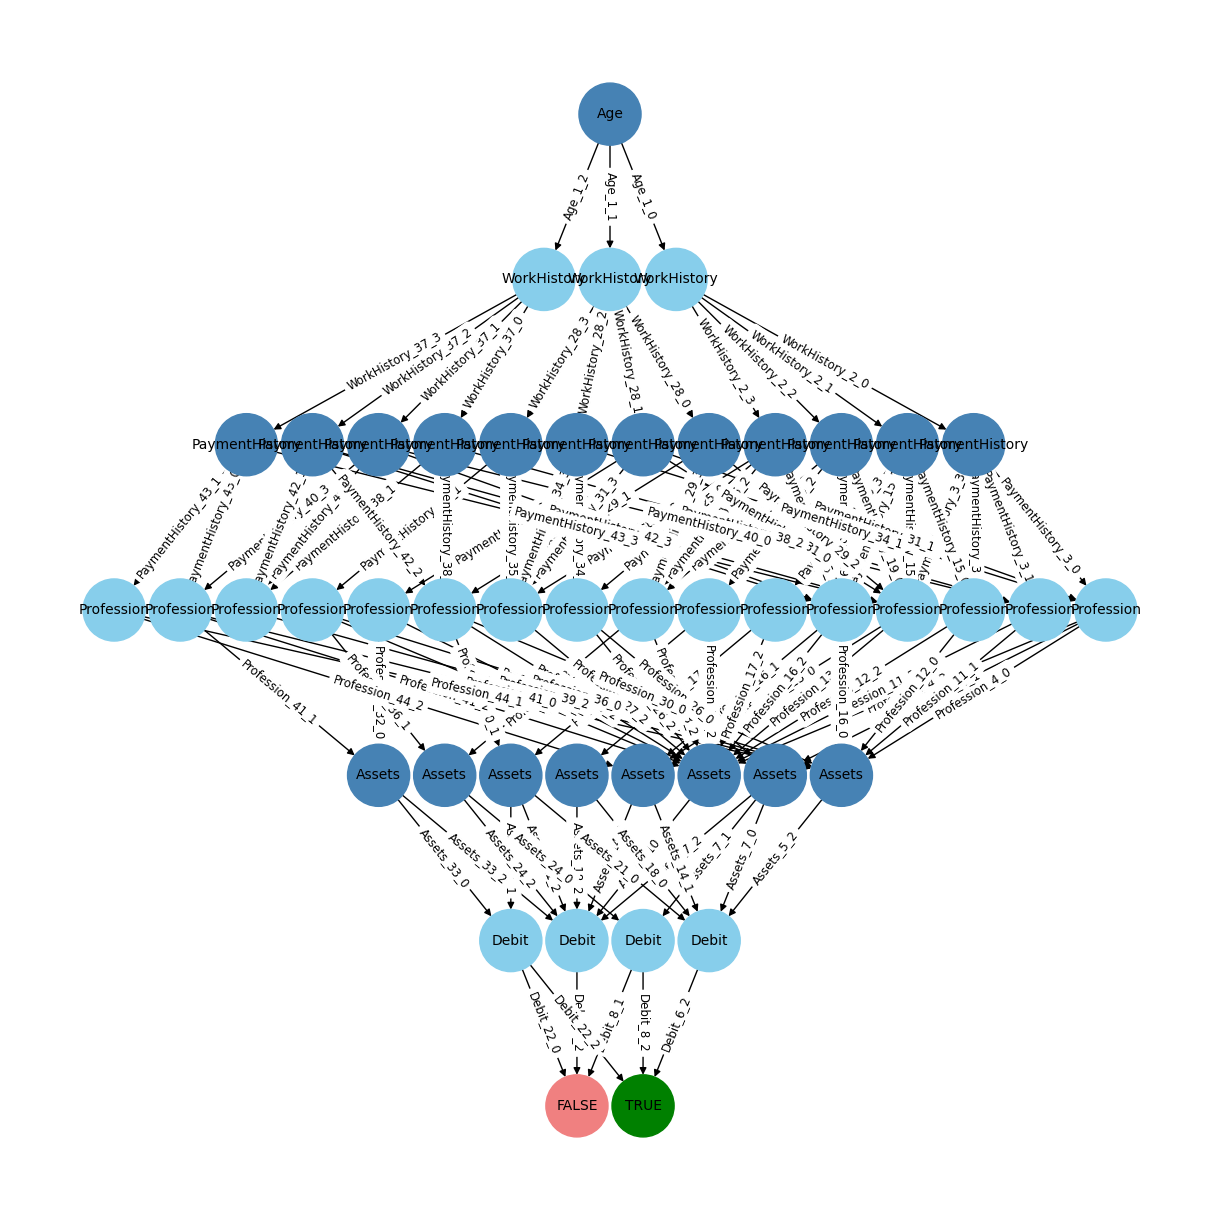

INFO:root:Plotted OBDD and saved to plots/credit10k_8765.png


Finished credit10k_8765
Successful compilations: [True]


In [6]:
run_compilation(config_paths)

In [7]:
# Create experiment config
create(IDS=[MODEL_ID])

['/home/ignacy/cmu/bnc-formal-verification/src/experiments_spring/credit10k_8765_config.json']

In [8]:
result_dict = run_experiments(MODEL_ID)

INFO:root:Verification case: 'Age-Monotonicity-#0' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#1' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#2' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#3' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#4' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#5' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#6' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#7' is PASSED (UNSAT).
INFO:root:Verification case: 'Age-Monotonicity-#8' is FAILED (SAT).
INFO:root:Verification case: 'Age-Monotonicity-#9' is FAILED (SAT).
INFO:root:Verification case: 'Assets-Monotonicity-#10' is PASSED (UNSAT).
INFO:root:Verification case: 'IfThen#0' is FAILED (SAT).
INFO:root:Verification case: 'IfThen#1' is FAILED (SAT).
INFO:root:Verification case: 'IfThen#2' is FAILED (SAT).
INFO:root:Verification case: 'IfThen#3' is FAILED (SAT).
INFO:root:Verifi

Finished credit10k_8765 in -2 ms. Where FMO took -1 ms and ITR took -1 ms.
ITR_UNSAT: 0, ITR_SAT: 11


In [9]:
get_table_with_metrics(result_dict, test_accuracy=test_accuracy)

,UNSAT,SAT,Adherence \%,Test Acc \%
0,0,11,0.0,70.03


In [10]:
# import os
# import json
# import pgmpy
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import networkx as nx
# import seaborn as sns
# from experiments_spring.experiment_utils import credit_pipeline

# pardir = os.path.join(os.getcwd()) 
# exp_dir = os.path.join(pardir, 'experiments_spring')
# # pardir = os.path.abspath(os.path.join(filedir, os.pardir))


# DATASET_NAME = 'credit10k'
# TARGET_COL = 'CreditWorthiness'
# ID = 8765

# MODEL_NET_PATH = os.path.join(exp_dir, 'models')
# DATASET_FILEPATH = os.path.join(exp_dir, 'data', f'{DATASET_NAME}.csv')

# print(f'filedir: {exp_dir}')
# print(f'DATASET_PATH: {DATASET_FILEPATH}')
# print(f'MODEL_NET_PATH: {MODEL_NET_PATH}')
# print(f'ARTIFACTS_PATH: {ARTIFACTS_PATH}')
# print(f'RULES_PATH: {RULES_FILEPATH}')
# print(f'ODD_PATH: {ODD_FILEPATH}')

In [11]:
data = pd.read_csv(f"{EXP_DIR}/{DATA_FOLDER}/{DATASET}.csv")
data.head()

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,Without_Reference,Unstable,Unreliable,a0_11100,s70001_more,Favorable,wealthy,High,Medium_income_profession,Promissing,a16_21,Negative
1,Aceptable,Unjustified_no_work,Unreliable,a0_11100,s70001_more,Favorable,average,High,Medium_income_profession,Promissing,a66_up,Negative
2,Aceptable,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,wealthy,High,Low_income_profession,Not_promissing,a16_21,Negative
3,Excellent,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,average,Medium,Medium_income_profession,Not_promissing,a16_21,Negative
4,Excellent,Unjustified_no_work,Unreliable,a11101_25900,s0_30000,Unfavorable,average,Low,Medium_income_profession,Not_promissing,a66_up,Negative


In [12]:
train, test, target_col = credit_pipeline(data)

data_preprocessed = pd.concat([train, test], axis=0)

#sort by index
data_preprocessed = data_preprocessed.sort_index()

data_preprocessed.head()

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,0,1,0,0,2,1,2,2,1,1,0,0
1,2,0,0,0,2,1,1,2,1,1,2,0
2,2,1,1,2,1,0,2,2,0,0,0,0
3,3,1,1,2,1,0,1,1,1,0,0,0
4,3,0,0,1,0,0,1,0,1,0,2,0


[<TabularCPD representing P(Age:3 | CreditWorthiness:2) at 0x71ebcd9f7100>, <TabularCPD representing P(Assets:3 | Worth:3) at 0x71ebcd9f7340>, <TabularCPD representing P(CreditWorthiness:2) at 0x71ebcd9f7010>, <TabularCPD representing P(Debit:3 | RatioDebInc:2) at 0x71ebcd9f6530>, <TabularCPD representing P(FutureIncome:2 | CreditWorthiness:2) at 0x71ebcd9f5420>, <TabularCPD representing P(Income:3 | Worth:3) at 0x71ebcd9f69e0>, <TabularCPD representing P(PaymentHistory:4 | Reliability:2) at 0x71ebcd9f5210>, <TabularCPD representing P(Profession:3 | FutureIncome:2) at 0x71ebcd9f6a40>, <TabularCPD representing P(RatioDebInc:2 | Income:3) at 0x71ebcd9f6500>, <TabularCPD representing P(Reliability:2 | CreditWorthiness:2) at 0x71ebcd9f51e0>, <TabularCPD representing P(WorkHistory:4 | Reliability:2) at 0x71ebcd9f47c0>, <TabularCPD representing P(Worth:3 | FutureIncome:2) at 0x71ebcd9f6770>]


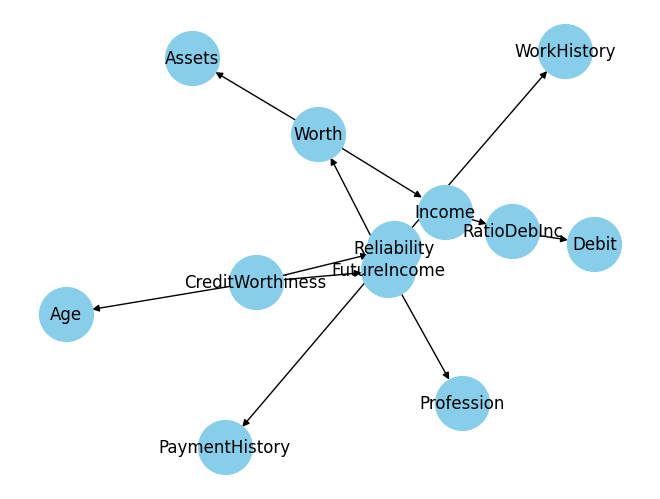

<Figure size 1300x1000 with 0 Axes>

In [13]:
model = NETReader(path=os.path.join(f"{EXP_DIR}/{MODELS_FOLDER}", f'{DATASET}_{MODEL_ID}.net')).get_model()
print(model.get_cpds())
# Plot the model
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=1)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue")
plt.figure(figsize=(13, 10))
plt.show()

In [14]:
with open(RULES_FILEPATH) as f:
    rules = json.load(f)
    
print(f'Number of rules: {len(rules)}')

Number of rules: 11


In [15]:
# LOAD ARTIFACTS IFTHEN Artifacts
ifthen_results_dict = {}
with open(os.path.join(ARTIFACTS_PATH, f'ifthen_{DATASET}.json')) as f:
    ifthen_results_dict = json.load(f)

In [16]:
with open(ODD_FILEPATH) as f:
    d = f.readline().replace('[', '').replace(']', '').split(',')
    d[-1] = d[-1][:-1]
    
    variables_order = [x.strip() for x in d]
    
    print(f'Number of variables: {len(variables_order)}')
    print(f'Variables: {variables_order}')
    

Number of variables: 6
Variables: ['Age', 'WorkHistory', 'PaymentHistory', 'Profession', 'Assets', 'Debit']


In [19]:
df = pd.DataFrame(rules)
print(f'Number of rules: {len(rules)}')

if_then_results_SAT = []
if_then_results_Exectime = []
if_then_results_truevars = []
if_then_results_falsevars = []
if_then_results_sat_models = []

for idx in df.index:
    # print(ifthen_results_dict[f'Verification case #IfThen#{idx}'])
    if_then_results_SAT.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['is_UNSAT'])
    if_then_results_Exectime.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['exec_time'])
    if_then_results_truevars.append(transform_mdd_names_back(ifthen_results_dict[f'Verification case #IfThen#{idx}']['true_variables'], odd_filepath=ODD_FILEPATH))
    if_then_results_falsevars.append(transform_mdd_names_back(ifthen_results_dict[f'Verification case #IfThen#{idx}']['false_variables'], odd_filepath=ODD_FILEPATH))
    if_then_results_sat_models.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['all_sat_models'])
    
df['ifthen_UNSAT'] = if_then_results_SAT  
df['ifthen_Exec_Time (ms)'] = if_then_results_Exectime
df['ifthen_True_Vars'] = if_then_results_truevars
df['ifthen_False_Vars'] = if_then_results_falsevars
df['ifthen_All_SAT_Models'] = if_then_results_sat_models


df.head(15)

Number of rules: 11


,rule,class,coverage,ifthen_UNSAT,ifthen_Exec_Time (ms),ifthen_True_Vars,ifthen_False_Vars,ifthen_All_SAT_Models
0,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.007,False,0.009934,"[Age=0th, WorkHistory=2th, PaymentHistory=3th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
1,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,False,0.005621,"[Age=0th, WorkHistory=2th, PaymentHistory=0th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
2,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,False,0.008800,"[Age=0th, WorkHistory=1th, PaymentHistory=2th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
3,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.006517,"[Age=1th, WorkHistory=0th, Profession=0th, Deb...","[WorkHistory=1th, WorkHistory=1th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
4,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.007582,"[Age=0th, WorkHistory=2th, PaymentHistory=3th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
5,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.005805,"[Age=0th, WorkHistory=0th, PaymentHistory=3th,...","[WorkHistory=1th, WorkHistory=1th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
6,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.008480,"[Age=0th, WorkHistory=3th, PaymentHistory=0th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
7,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.005406,"[Age=2th, WorkHistory=3th, Profession=0th, Deb...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
8,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,False,0.009021,"[Age=1th, WorkHistory=0th, Profession=0th, Deb...","[WorkHistory=1th, WorkHistory=1th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."
9,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.005483,"[Age=0th, WorkHistory=1th, PaymentHistory=2th,...","[WorkHistory=0th, WorkHistory=0th, PaymentHist...","[{'true_variables': ['Node_Age_1', 'Node_WorkH..."


In [20]:
# Print how many rules are SAT and UNSAT
print(f'Number of SAT rules: {len(df[df["ifthen_UNSAT"] == False])}')
print(f'Number of UNSAT rules: {len(df[df["ifthen_UNSAT"] == True])}')
print('Bear in mind that UNSAT means that the model is adherent to the rule. (proof by contradiction)')

Number of SAT rules: 11
Number of UNSAT rules: 0
Bear in mind that UNSAT means that the model is adherent to the rule. (proof by contradiction)


In [21]:
# UNSAT RULES
with open(f'{EXP_DIR}/expert_rules.json', 'r') as f:
    old = json.load(f)
new = old + [{'rule': x['rule'], 'class': x['class'], 'coverage': x['coverage']} for _, x in df[df['ifthen_UNSAT'] == True].iterrows()]
with open(f'{EXP_DIR}/expert_rules.json', 'w') as f:
    json.dump(new, f, indent=4)
    
with open(f'{EXP_DIR}/expert_rules.json', 'r') as f:
    rules = json.load(f)
    # deduplicate
    rules = [(tuple([(a,b,c) for a,b,c in x['rule']]), x['class'], x['coverage']) for x in rules]
    rules = list(set(rules))
    rules = [{'rule': x[0], 'class': x[1], 'coverage': x[2]} for x in rules]
    
    print(f'Number of rules: {len(rules)}')
    
with open(f'{EXP_DIR}/expert_rules_dedup.json', 'w') as f:
    json.dump(rules, f, indent=4)

Number of rules: 11


In [22]:
from experiments_spring.experiment_utils import credit10k_translation_table as translation_table

In [23]:
analyse_records(df, data, translation_table=translation_table, unsat=True, how_many=5,
                target_col=target_col, dataset_name=DATASET, model_id=MODEL_ID, artifacts_path=ARTIFACTS_PATH)

In [24]:
example_rule = df[df['ifthen_UNSAT'] == False].reset_index().iloc[0].to_dict()

legal_values = translate_rule_to_set_of_legal_values(example_rule['rule'], 
                                                    target_col,
                                                    example_rule['class'], 
                                                    translation_table)

data_with_preds = data.copy()
# data_with_preds['prediction'] = predictions

filtered_data = filter_out_region_of_a_rule(legal_values, data_with_preds, target_col)
filtered_data

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
112,Excellent,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,poor,Medium,Low_income_profession,Promissing,a16_21,Positive
263,Without_Reference,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
315,Aceptable,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive
395,Excellent,Unjustified_no_work,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
499,Without_Reference,Stable,Reliable,a11101_25900,s30001_70000,Favorable,poor,Medium,Low_income_profession,Promissing,a22_65,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
9120,Aceptable,Unjustified_no_work,Reliable,a25901_more,s70001_more,Favorable,poor,High,Low_income_profession,Promissing,a22_65,Positive
9207,Aceptable,Justified_no_work,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
9212,Without_Reference,Justified_no_work,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive
9584,Aceptable,Stable,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive


In [31]:
filtered_data.index




train_df[target_col].value_counts()

CreditWorthiness
1    3829
0    3171
Name: count, dtype: int64

In [39]:
new_train_df = train_df.copy()
for idx in filtered_data.index:
    # Flip the class
    new_train_df.loc[idx, target_col] = 1 - new_train_df.loc[idx, target_col]
    
new_train_df[target_col].value_counts()

KeyError: 263